<a href="https://colab.research.google.com/github/kalviyarasi/Task-1/blob/main/Exploratory_Data_Analysis_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**

# **Task #5 - Exploratory Data Analysis - Sports**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/matchesexcel.csv"
data=pd.read_csv(path)
data.describe

<bound method NDFrame.describe of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [4]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
path1="/content/drive/MyDrive/deliveriesexcel.csv"
Data=pd.read_csv(path1)
Data.describe

<bound method NDFrame.describe of         match_id  inning  ... dismissal_kind    fielder
0              1       1  ...            NaN        NaN
1              1       1  ...            NaN        NaN
2              1       1  ...            NaN        NaN
3              1       1  ...            NaN        NaN
4              1       1  ...            NaN        NaN
...          ...     ...  ...            ...        ...
179073     11415       2  ...            NaN        NaN
179074     11415       2  ...            NaN        NaN
179075     11415       2  ...        run out  KH Pandya
179076     11415       2  ...            NaN        NaN
179077     11415       2  ...            lbw        NaN

[179078 rows x 21 columns]>

In [6]:
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
season_data=data[['id','season','winner']]
season_data.head()

,id,season,winner
0,1,2017,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant
2,3,2017,Kolkata Knight Riders
3,4,2017,Kings XI Punjab
4,5,2017,Royal Challengers Bangalore


In [8]:
complete_data=Data.merge(season_data,how='inner',left_on='match_id',right_on='id')
complete_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [9]:
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [10]:
wins_per_season=data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

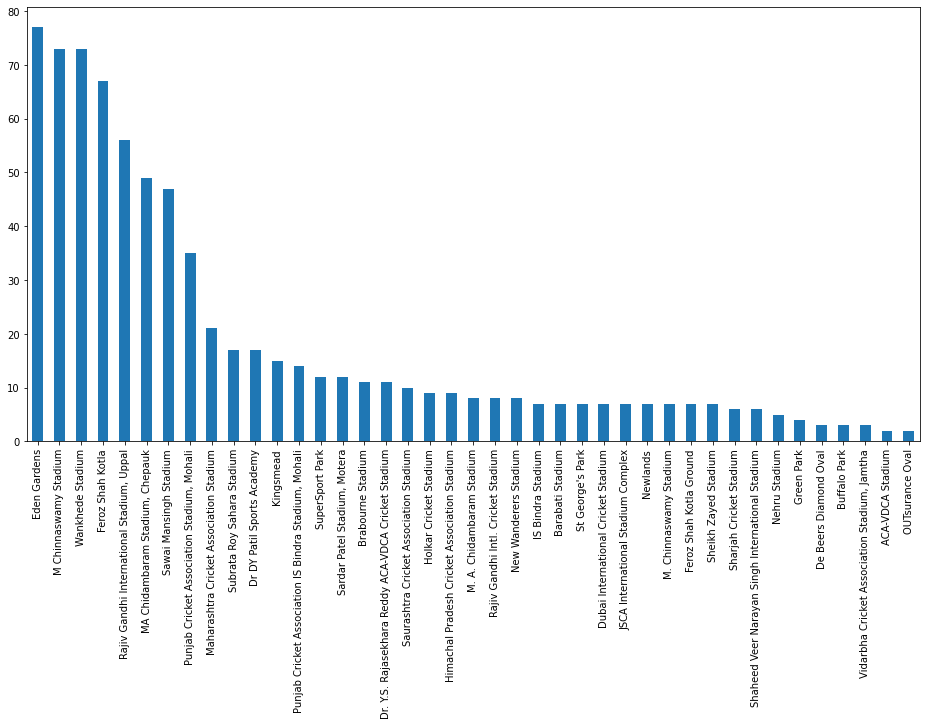

In [13]:
plt.figure(figsize=(16,8))
data.venue.value_counts().plot.bar()

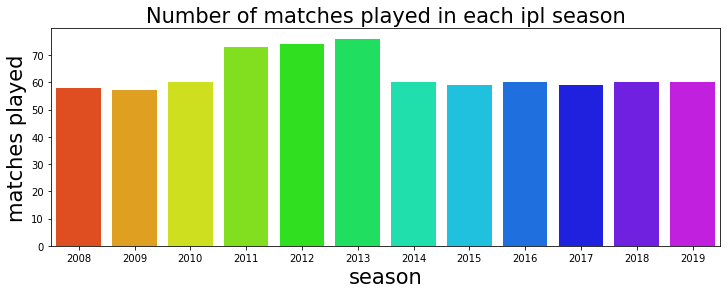

In [16]:
plt.figure(figsize=(12,4))
sns.countplot('season',data=data,palette="gist_rainbow")
plt.title("Number of matches played in each ipl season",fontsize=21)
plt.xlabel("season",fontsize=21)
plt.ylabel("matches played",fontsize=21)
plt.show()

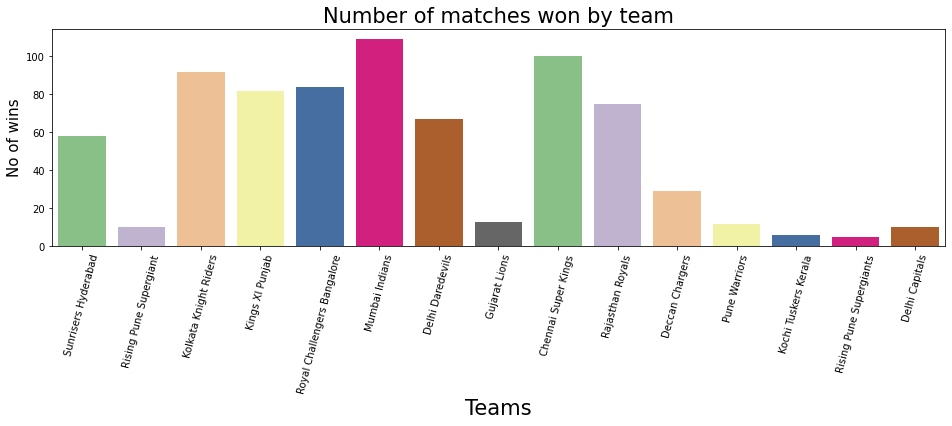

In [19]:
plt.figure(figsize=(16,4))
sns.countplot(x='winner',data=data,palette='Accent')
plt.title("Number of matches won by team",fontsize=21)
plt.xticks(rotation=75)
plt.xlabel("Teams",fontsize=21)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [20]:
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')

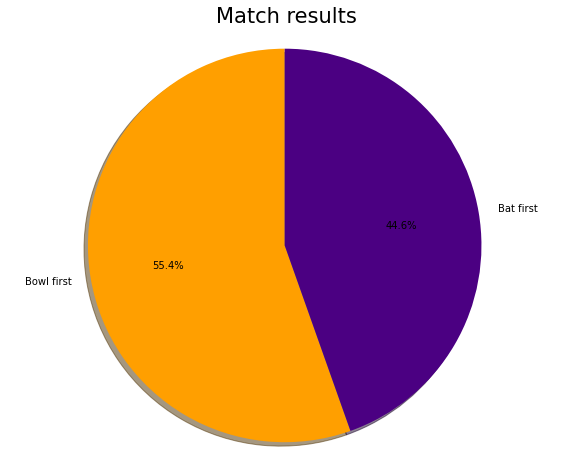

In [21]:
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes=Win.values
colors=['#ff9f00','#4B0082']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Match results',fontsize=21)
plt.axis("equal",fontsize=21)
plt.show()

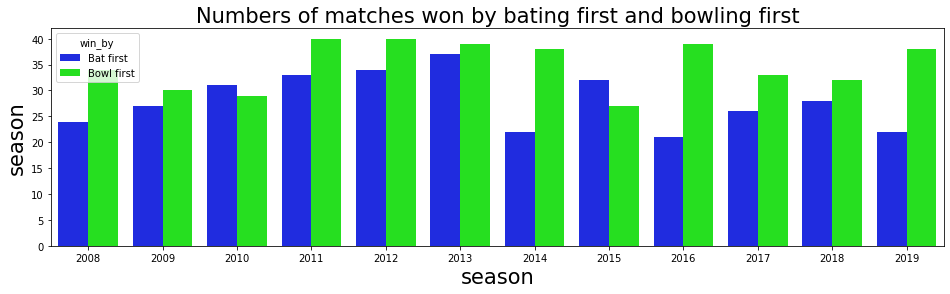

In [22]:
plt.figure(figsize=(16,4))
sns.countplot('season',hue='win_by',data=data,palette='hsv_r')
plt.title("Numbers of matches won by bating first and bowling first",fontsize=21)
plt.xlabel("season",fontsize=21)
plt.ylabel("season",fontsize=21)
plt.show()

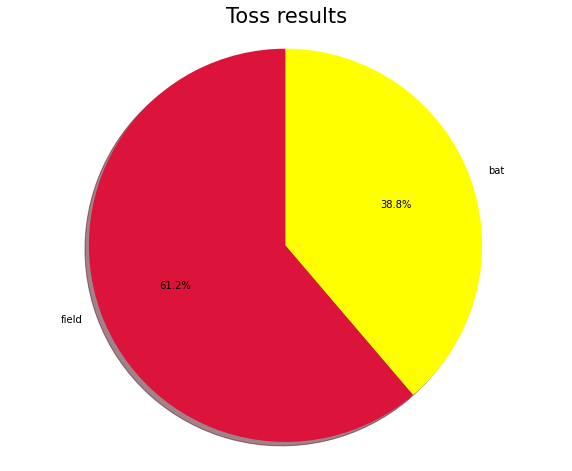

In [23]:
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values
colors=['#DC143C','#FFFF00']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Toss results',fontsize=21)
plt.axis('equal',fontsize=21)
plt.show()

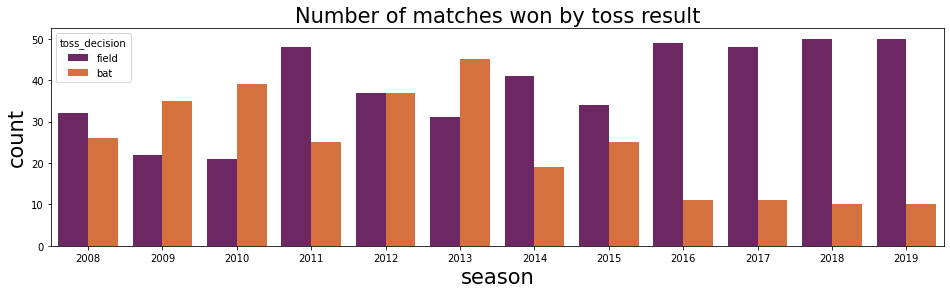

In [25]:
plt.figure(figsize=(16,4))
sns.countplot('season',hue='toss_decision',data=data,palette='inferno')
plt.title("Number of matches won by toss result",fontsize=21)
plt.xlabel("season",fontsize=21)
plt.ylabel("count",fontsize=21)
plt.show()

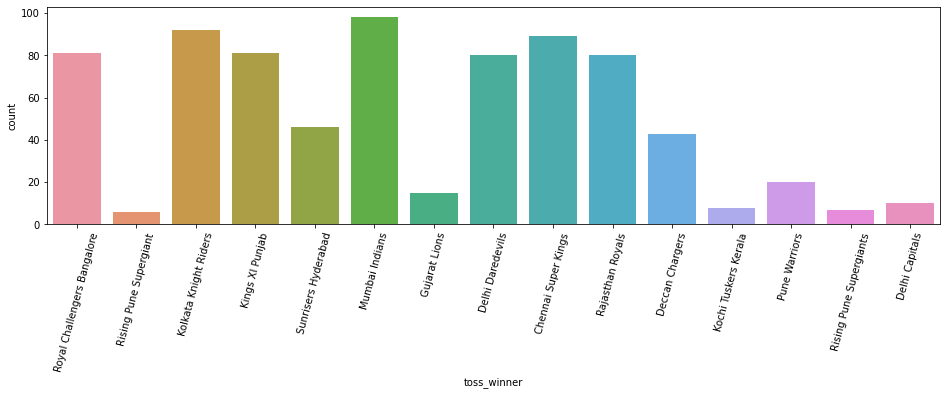

In [26]:
plt.figure(figsize=(16,4))
sns.countplot(x='toss_winner',data=data)
plt.xticks(rotation=75)
plt.show()

In [27]:
data.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [28]:
data.loc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                       5/6/2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
win_by                    Bat first
Name: 43, dtype: object

In [29]:
final_matches=data.drop_duplicates(subset=['season'],keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


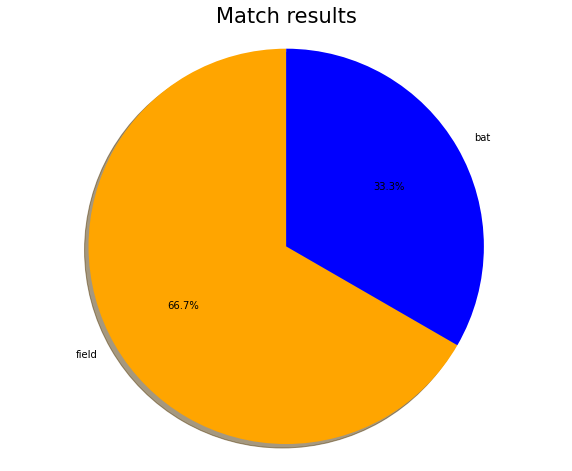

In [30]:
match=final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes=match.values
colors=['orange','blue']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Match results',fontsize=21)
plt.axis('equal',fontsize=21)
plt.show()

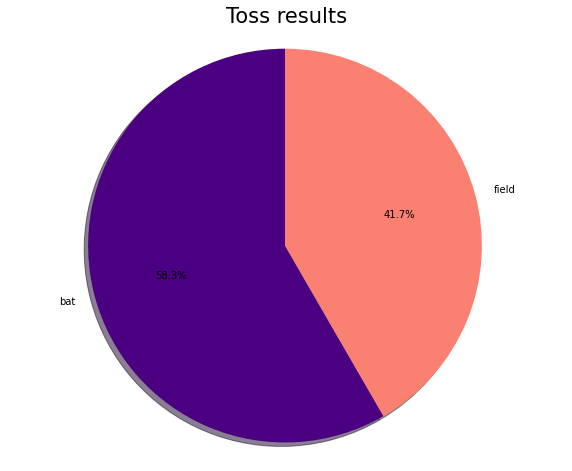

In [31]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values
colors=['#4B0082','#FA8072']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss results",fontsize=21)
plt.axis('equal',fontsize=21)
plt.show()

<function matplotlib.pyplot.show>

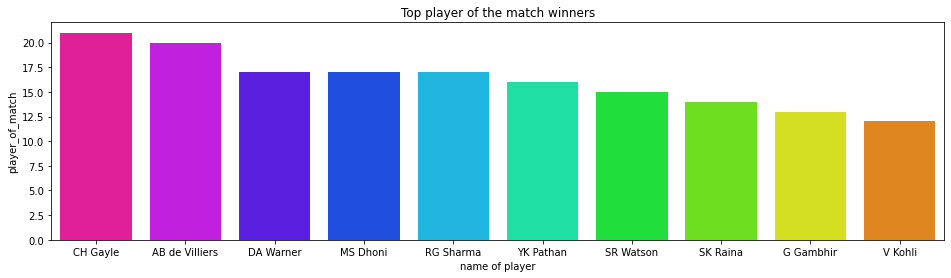

In [33]:
plt.figure(figsize=(16,4))
top_players=data.player_of_match.value_counts()[:10]
plt.ylabel("count")
plt.title("Top player of the match winners")
plt.xlabel("name of player")
sns.barplot(x=top_players.index,y=top_players,orient='v',palette="hsv_r")
plt.show

In [34]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [35]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

In [36]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop='id')

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [37]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [38]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


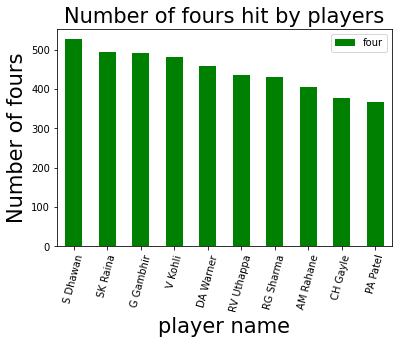

In [39]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='green')
plt.title("Number of fours hit by players",fontsize=21)
plt.xticks(rotation=75)
plt.xlabel("player name",fontsize=21)
plt.ylabel("Number of fours",fontsize=21)
plt.show()

In [40]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


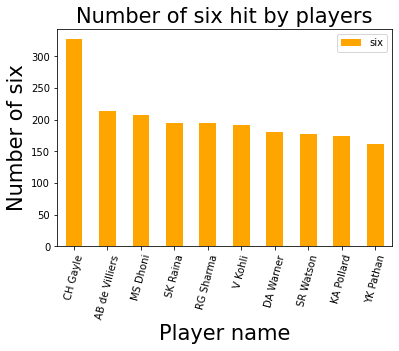

In [41]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='orange')
plt.title("Number of six hit by players",fontsize=21)
plt.xticks(rotation=75)
plt.xlabel("Player name",fontsize=21)
plt.ylabel("Number of six",fontsize=21)
plt.show()

In [42]:
batsman_score=Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 leading run scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 leading run scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


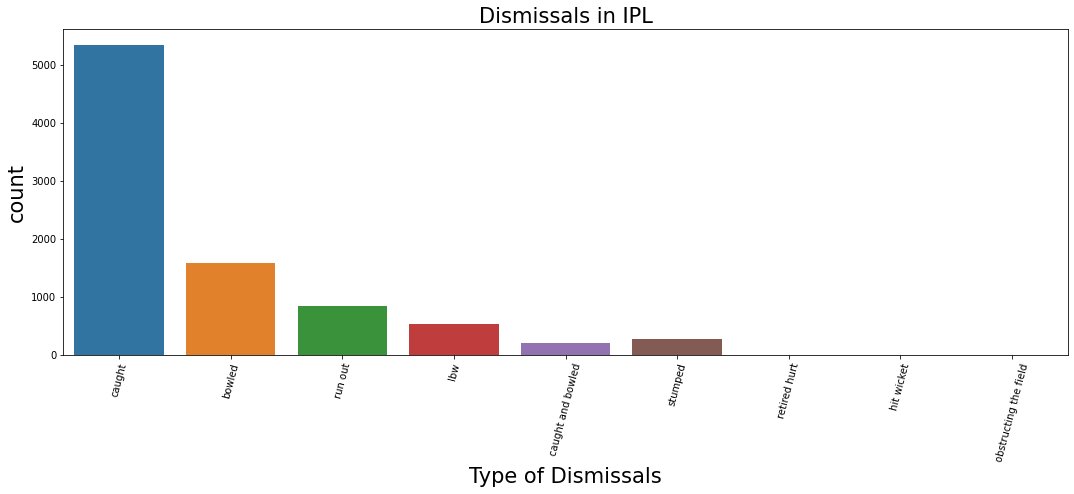

In [44]:
plt.figure(figsize=(18,6))
ax=sns.countplot(Data.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=21)
plt.xlabel("Type of Dismissals",fontsize=21)
plt.ylabel("count",fontsize=21)
plt.xticks(rotation=75)
plt.show()

In [45]:
wicket_data=Data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [46]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


# **CONCLUSION**
The highest number of matches played in IPL season was 2013,2014,2015

The highest number of IPL title is won by mumbai indians (4 titles out of 12)

Teams which bowl first has higher chances of winning then the team which bat first

After winning the toss most teams decide to do fielding first

In final, teams which dedcide to field first has higher chances of winning the match

Chris gayle is th Top player of match winners

out of 12 IPL finals, 9 times the team that won the toss won the IPL final

The highest number of fours hit by player is Shikar Dhawan

The highest number of six hit by the player is Chris Gayle

The highest number of DIsmissals in IPL was Catch out

The most wicket taking bowler in IPL is SL malinga